# **GRIP : THE SPARKS FOUNDATION**

## **PREDICTION USING DECISION TREE ALGORITHM**

*Author : Shreea Bose*

*Date : October, 2023*

***Sparks Foundation Internship for Data Science and Business Analytics***

#### **TASK: CREATE A DECISION TREE AND VISUALIZE IT GRAPHICALLY**

#### **PURPOSE: If we feed new data to the classifier, it would be able to predict the class correctly.**

## Decision Tree

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems.



*   **Root Node:** It is the topmost node in the tree,  which represents the complete dataset. It is the starting point of the decision-making process.
*   **Decision/Internal Node:** A node that symbolizes a choice regarding an input feature. Branching off of internal nodes connects them to leaf nodes or other internal nodes.
*   **Leaf/Terminal Node:** A node without any child nodes that indicates a class label or a numerical value.
*   **Splitting:** The process of splitting a node into two or more sub-nodes using a split criterion and a selected feature.
*   **Branch/Sub-Tree:** A subsection of the decision tree starts at an internal node and ends at the leaf nodes.
*   **Parent Node:** The node that divides into one or more child nodes.
*   **Child Node:** The nodes that emerge when a parent node is split.
*   **Impurity:** A measurement of the target variable’s homogeneity in a subset of data. It refers to the degree of randomness or uncertainty in a set of examples. The Gini index and entropy are two commonly used impurity measurements in decision trees for classifications task



**Information gain** is the measurement of changes in entropy after the segmentation of a dataset based on an attribute. A decision tree algorithm always tries to maximize the value of information gain, and a node/attribute having the highest information gain is split first. It can be calculated using the below formula:

Information Gain= Entropy(S)- [(Weighted Avg) * Entropy(each feature)

Entropy is a metric to measure the impurity in a given attribute. It specifies randomness in data.

The Gini index measures impurity or purity used while creating a decision tree in the CART(Classification and Regression Tree) algorithm. Gini Impurity is a score that evaluates how accurate a split is among the classified groups.

##### **Importing the Data**

In [1]:
# import the packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
from sklearn import tree

In [23]:
# Reading data from remote link
url = "/content/Iris.csv"
df = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [25]:
#print the first 10 datasets
df.head(30)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


##### **Analysing the Data**

In [5]:
# number of rows and columns
df.shape

(150, 6)

In [6]:
# checking if null
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
# counting the number of species
df.value_counts("Species")

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

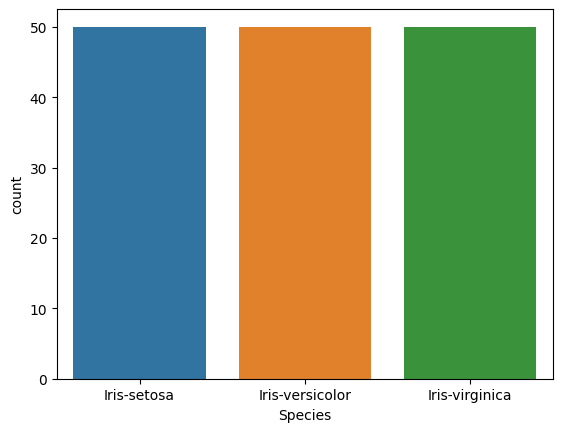

In [8]:
sns.countplot(x='Species', data=df )
plt.show()

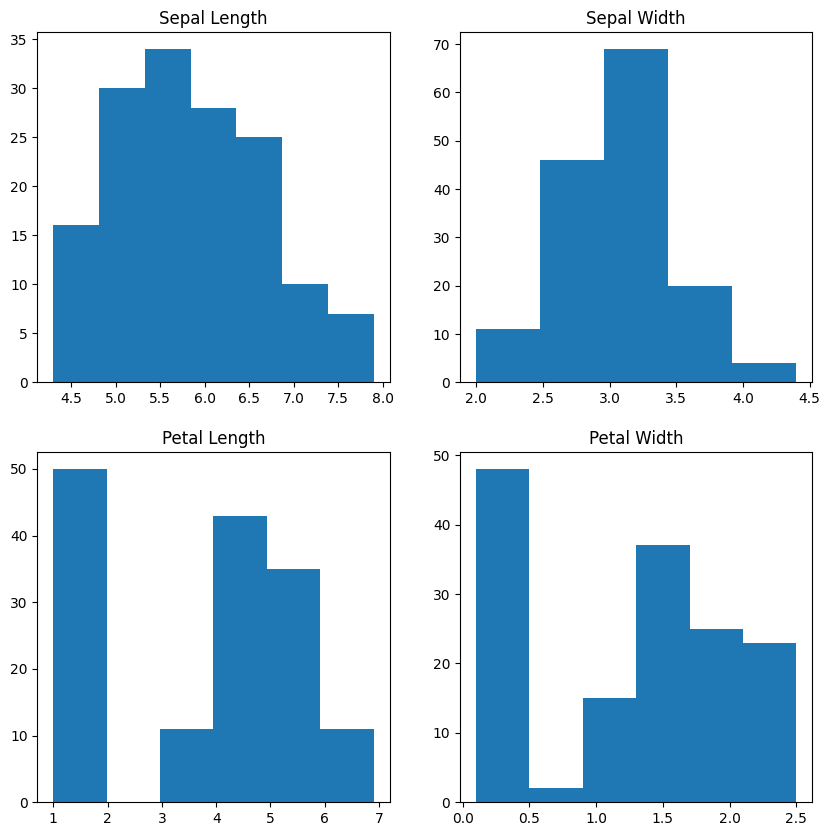

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))

axes[0,0].set_title("Sepal Length")
axes[0,0].hist(df['SepalLengthCm'], bins=7)

axes[0,1].set_title("Sepal Width")
axes[0,1].hist(df['SepalWidthCm'], bins=5);

axes[1,0].set_title("Petal Length")
axes[1,0].hist(df['PetalLengthCm'], bins=6);

axes[1,1].set_title("Petal Width")
axes[1,1].hist(df['PetalWidthCm'], bins=6);

##### **Find the accuracy of the model using Decision Tree**

In [10]:
# divide the data into X and Y for classification

X=df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
X.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
Y=df[["Species"]]
Y.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [12]:
regressor = DecisionTreeClassifier(random_state=0,criterion="gini")

In [13]:
regressor.fit(X,Y)

DecisionTreeClassifier(random_state=0)

In [14]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
np.mean(cross_val_score(regressor, X, Y, cv=cv))*100

96.33333333333333

In [15]:
accuracy_train = regressor.score(X, Y)
print('Accuracy: ', round(accuracy_train*100,5), '%')

Accuracy:  100.0 %


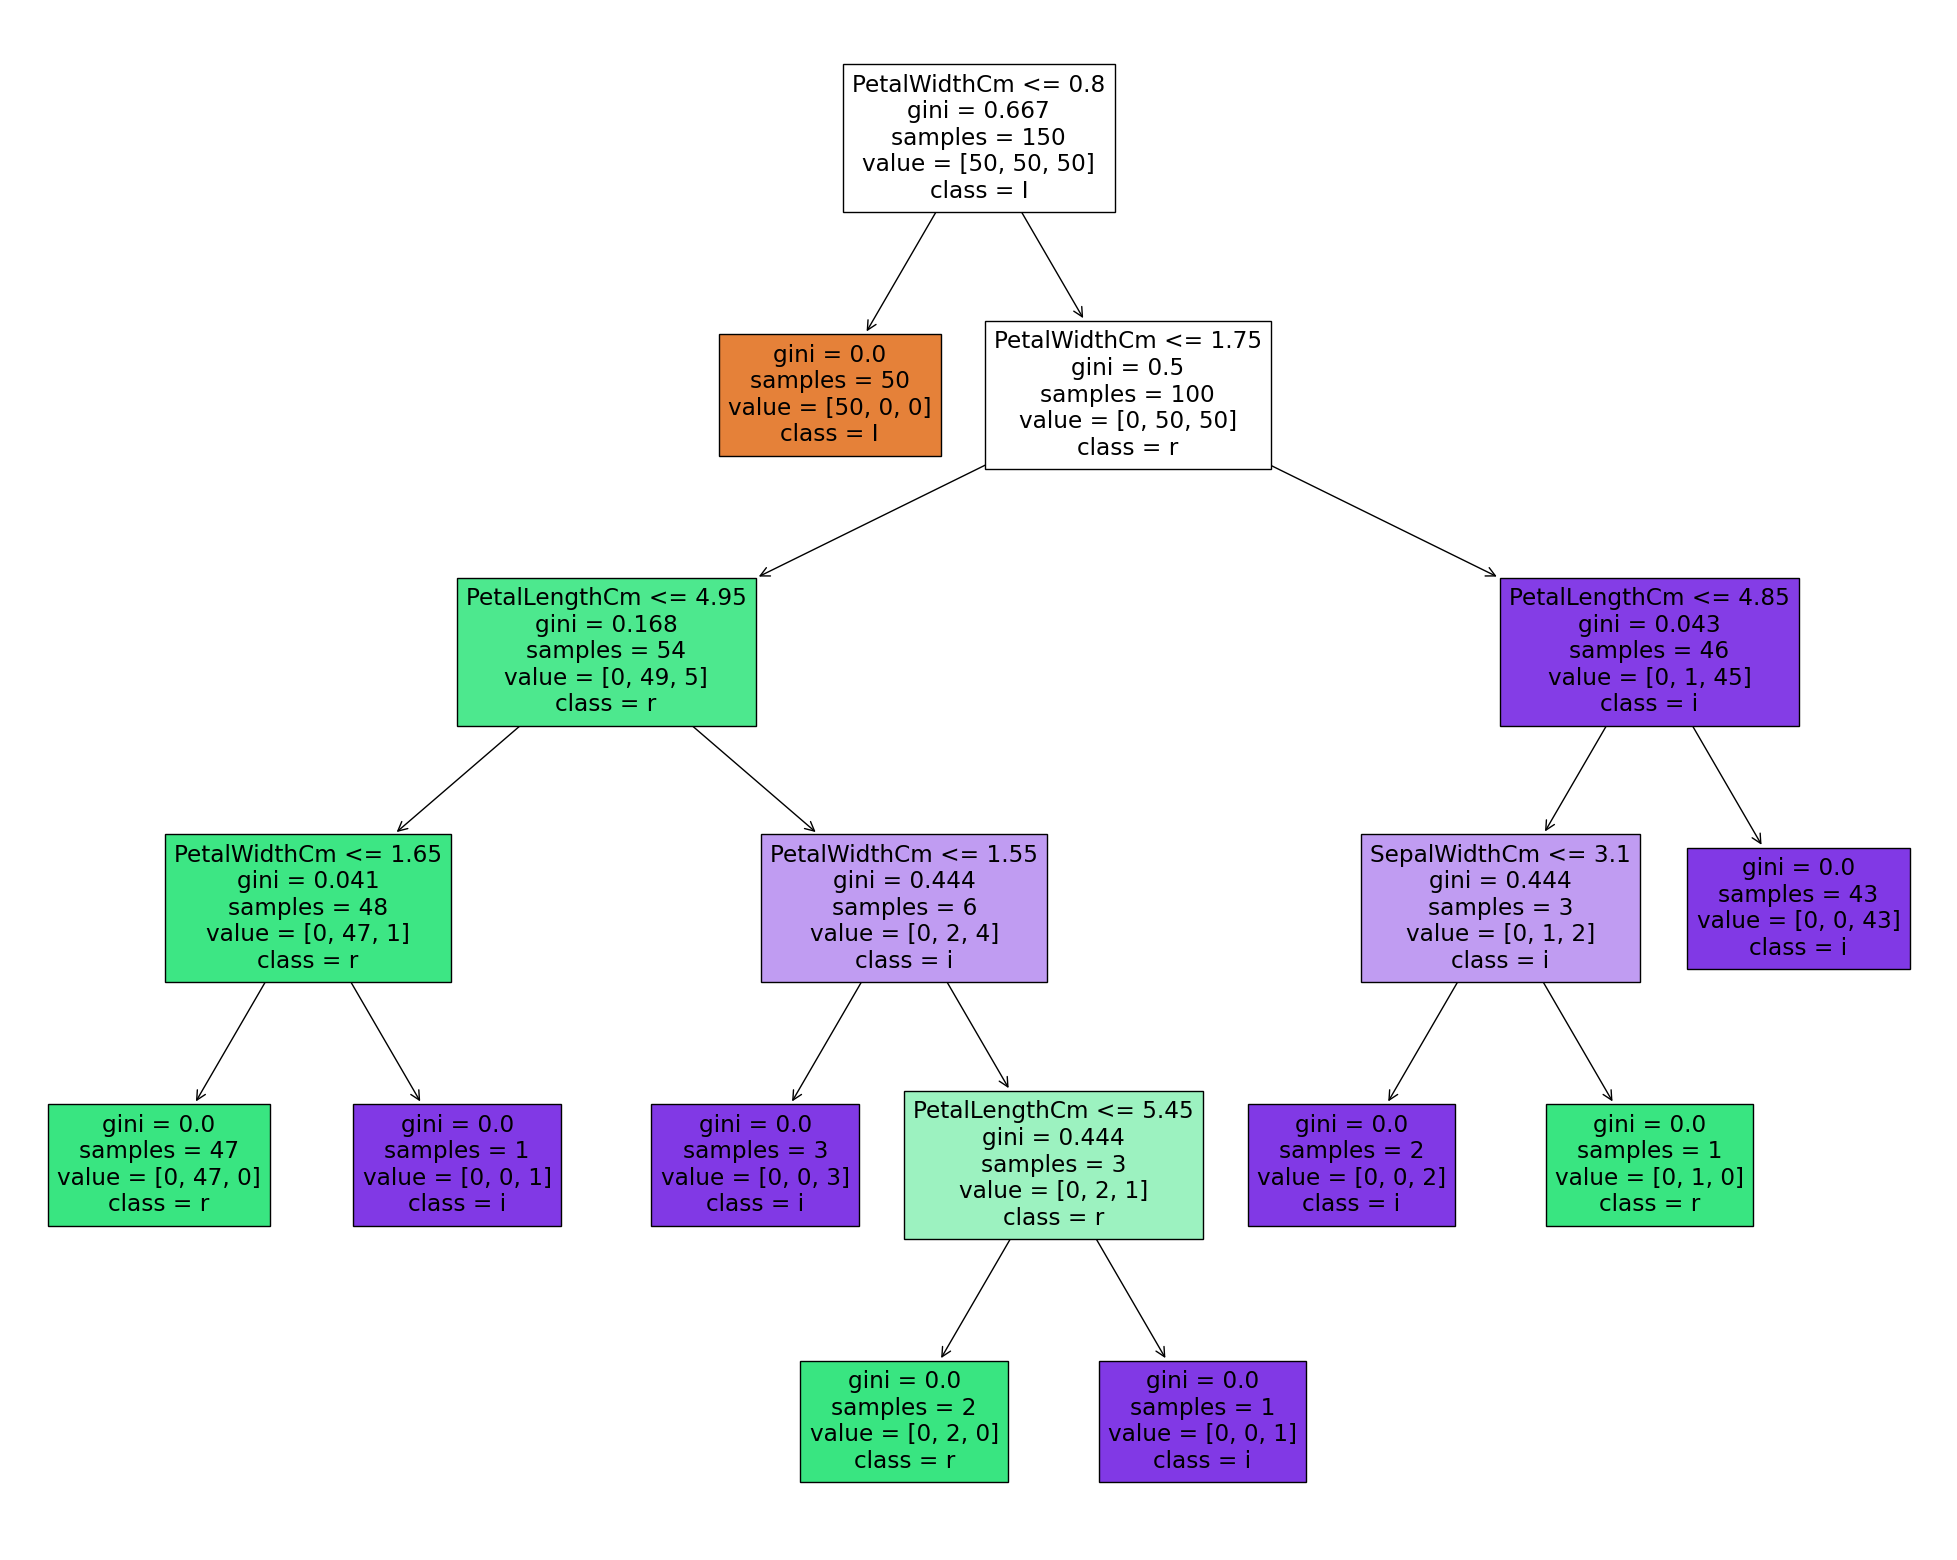

In [16]:
fig=plt.figure(figsize=(25,20))
df_tree=tree.plot_tree(regressor,
                       feature_names =["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"],
                       class_names="Iris",
                       filled=True)

In [17]:
regressor1 = DecisionTreeClassifier(random_state=0,criterion="entropy")
regressor1.fit(X,Y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [18]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
np.mean(cross_val_score(regressor1, X, Y, cv=cv))*100

96.33333333333333

In [19]:
accuracy_test = regressor1.score(X, Y)
print('Accuracy: ', round(accuracy_test*100,5), '%')

Accuracy:  100.0 %


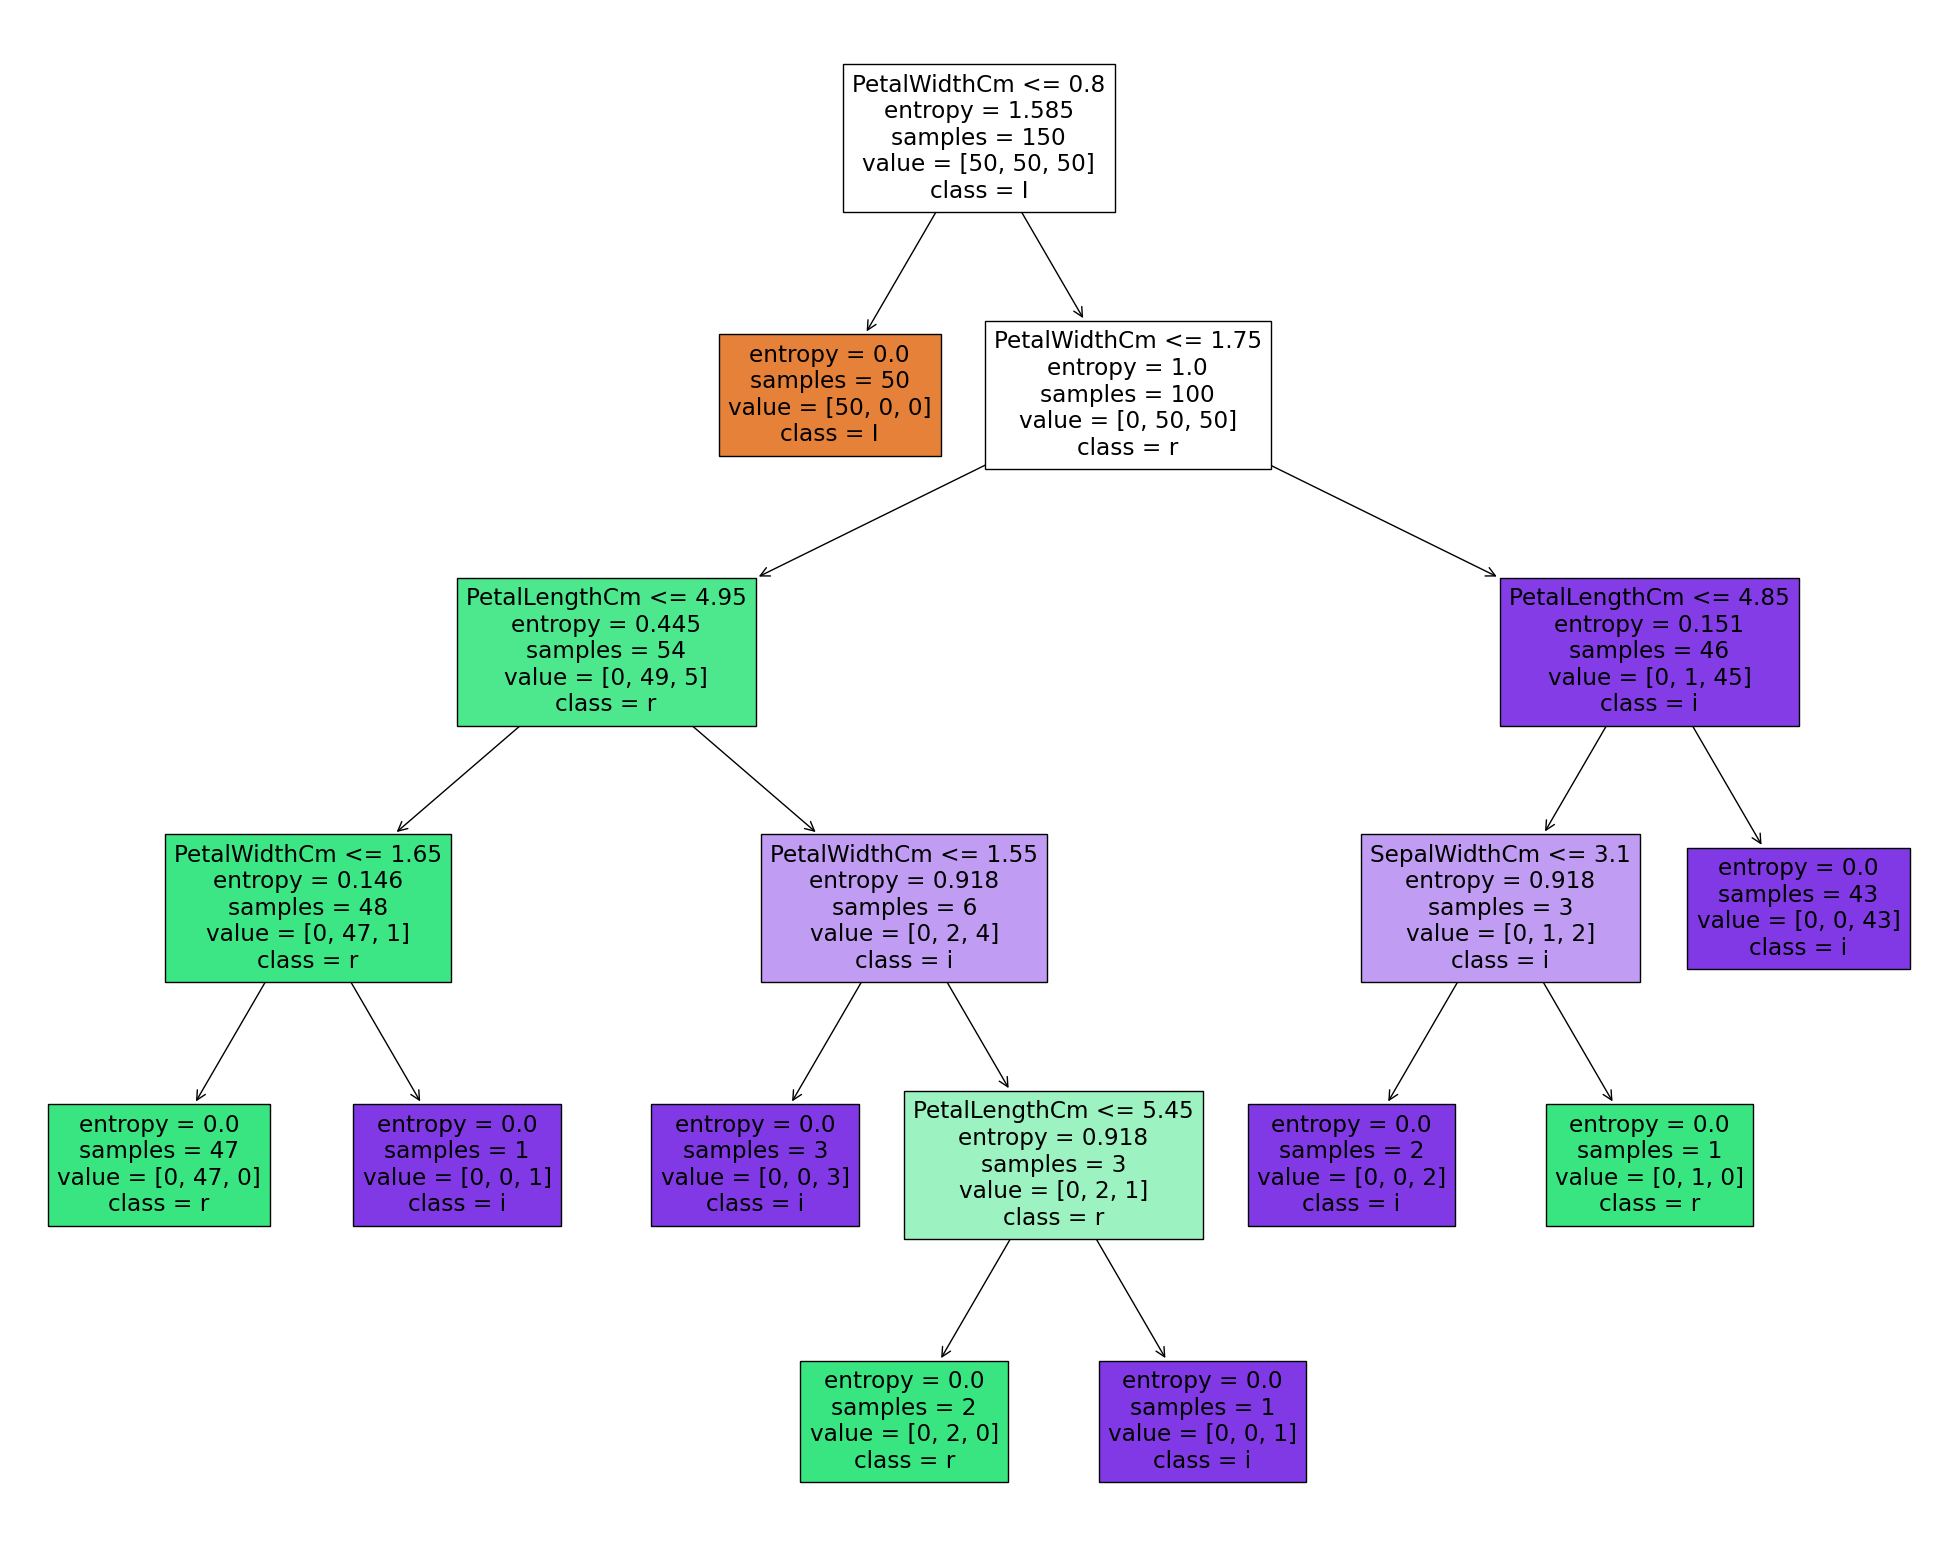

In [20]:
fig=plt.figure(figsize=(25,20))
df_tree1=tree.plot_tree(regressor1,
                       feature_names =["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"],
                       class_names="Iris",
                       filled=True)

##### **Prediction of newly added data**

In [24]:
test=[[2,4,3,1.5]]
y_pred = regressor1.predict(test)
print(y_pred[0])

Iris-versicolor


In [26]:
test=[[5.4,3.9,1.3,0.4]]
y_pred = regressor1.predict(test)
print(y_pred[0])

Iris-setosa
